In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-dataset/online_sales_dataset.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/online-sales-dataset/online_sales_dataset.csv")

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.480000,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00,85.74,46567.0,Belgium,0.150000,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00,95.65,75098.0,Norway,0.040000,Bank Transfer,6.48,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00,98.19,87950.0,Belgium,0.050000,paypall,12.56,Apparel,Online,Not Returned,UPS,Berlin,High
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00,98.17,39718.0,Italy,0.160000,Bank Transfer,7.71,Apparel,Online,Not Returned,Royal Mail,London,Low


In [5]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0         221958  SKU_1964     White Mug        38  2020-01-01 00:00   
1         771155  SKU_1241     White Mug        18  2020-01-01 01:00   
2         231932  SKU_1501    Headphones        49  2020-01-01 02:00   
3         465838  SKU_1760     Desk Lamp        14  2020-01-01 03:00   
4         359178  SKU_1386     USB Cable       -30  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777     354083  SKU_1562      Blue Pen        25  2025-09-05 01:00   
49778     296698  SKU_1930     USB Cable         7  2025-09-05 02:00   
49779     177622  SKU_1766  Office Chair        43  2025-09-05 03:00   
49780     701213  SKU_1602      Notebook        48  2025-09-05 04:00   
49781     772215  SKU_1832     White Mug        30  2025-09-05 05:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
0           1.71     37039.0  

In [6]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

# Eksik Verileri Düzeltme
* CustomerID= Müşteri kimlikleri içindir. Unknown etiketi ile doldurabiliriz.
* ShippingCost= İşlem nakliye fiyatı içindir. Ortalama ile doldurmak daha uygundur. 
* WarehouseLocation= Siparişin karşılandığı depo yeri. Unknown etiketi ile doldurabiliriz

In [7]:
# Eksik müşteri kimliklerini doldurma
df['CustomerID'].fillna('Unknown', inplace=True)

/tmp/ipykernel_17/3933710325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna('Unknown', inplace=True)
/tmp/ipykernel_17/3933710325.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['CustomerID'].fillna('Unknown', inplace=True)


In [8]:
# Kategori bazında ortalama nakliye maliyetiyle doldurma
df['ShippingCost'].fillna(df.groupby('Category')['ShippingCost'].transform('mean'), inplace=True)


/tmp/ipykernel_17/4126620068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ShippingCost'].fillna(df.groupby('Category')['ShippingCost'].transform('mean'), inplace=True)


In [9]:
# Eksik depo konumlarını "Unknown" olarak doldur
df['WarehouseLocation'].fillna('Unknown', inplace=True)


/tmp/ipykernel_17/3329121511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WarehouseLocation'].fillna('Unknown', inplace=True)


# Eksik Veriler Sonrası Kontrol


In [10]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

#  Temel İstatistikleri İnceleme


In [11]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,49782.000000,49782.000000
mean,550681.239946,22.372343,47.537862,0.275748,17.494549
std,260703.009944,17.917774,33.479510,0.230077,7.037735
min,100005.000000,-50.000000,-99.980000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,0.130000,11.540000
50%,552244.000000,23.000000,48.920000,0.260000,17.509095
75%,776364.000000,37.000000,74.610000,0.380000,23.410000
max,999997.000000,49.000000,100.000000,1.999764,30.000000


# Eşsiz Değerleri İnceleme 
Kategorik sütunlardaki farklı değerleri görmek için unique() fonksiyonunu kullanabiliriz.


In [12]:
df['PaymentMethod'].unique()

array(['Bank Transfer', 'paypall', 'Credit Card'], dtype=object)

In [13]:
df['Country'].unique()

array(['Australia', 'Spain', 'Germany', 'Netherlands', 'United Kingdom',
       'Sweden', 'Belgium', 'Norway', 'Italy', 'Portugal', 'France',
       'United States'], dtype=object)

# Negatif Değerleri Kontrol Et
Quantity ve UnitPrice gibi sütunlarda negatif değerler vardır. 

In [14]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,Unknown,United Kingdom,1.501433,Bank Transfer,17.457077,Electronics,In-store,Not Returned,FedEx,Unknown,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00,-72.33,Unknown,Netherlands,1.972087,paypall,17.457077,Electronics,In-store,Not Returned,Royal Mail,Unknown,Low
167,318969,SKU_1115,Desk Lamp,-19,2020-01-07 23:00,-3.61,Unknown,Italy,1.052254,Credit Card,17.509095,Apparel,In-store,Not Returned,UPS,Unknown,High
199,867595,SKU_1343,White Mug,-2,2020-01-09 07:00,-96.08,Unknown,Portugal,1.702088,Bank Transfer,17.524056,Accessories,Online,Not Returned,FedEx,Unknown,Low
262,937291,SKU_1936,Wall Clock,-16,2020-01-11 22:00,-73.60,Unknown,Germany,1.535440,Credit Card,17.457077,Electronics,Online,Not Returned,DHL,Unknown,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,553510,SKU_1943,T-shirt,-4,2025-09-01 11:00,-74.57,Unknown,France,1.306613,Credit Card,17.463875,Stationery,Online,Not Returned,Royal Mail,Unknown,Low
49695,855821,SKU_1500,Wireless Mouse,-11,2025-09-01 15:00,-18.88,Unknown,Portugal,1.569082,Bank Transfer,17.518234,Furniture,In-store,Not Returned,FedEx,Unknown,Low
49718,745888,SKU_1224,T-shirt,-2,2025-09-02 14:00,-84.25,Unknown,United States,1.420665,Bank Transfer,17.524056,Accessories,In-store,Not Returned,Royal Mail,Unknown,Medium
49730,487771,SKU_1083,Wall Clock,-7,2025-09-03 02:00,-57.31,Unknown,United Kingdom,1.139869,paypall,17.524056,Accessories,Online,Not Returned,DHL,Unknown,Low


# Negatif Satışları Görselleştirme
Ürünler ve Negatif değerdeki Quantity görselleştirmesi


In [15]:
negative_quantity = df[df['Quantity'] < 0]
product_returns = negative_quantity['Description'].value_counts().head(10)

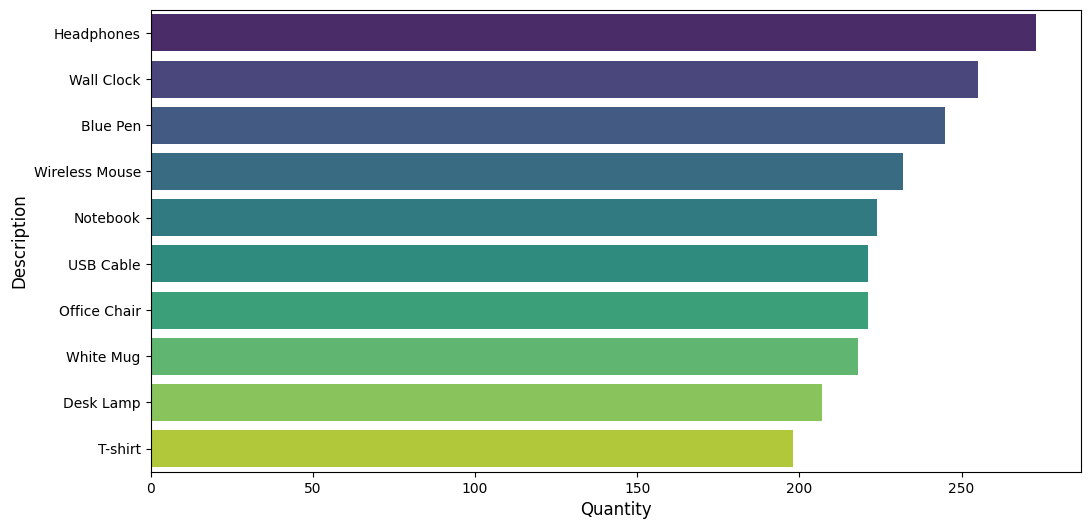

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_returns.values, y=product_returns.index, palette="viridis")
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Description", fontsize=12)
plt.show()

# Yeni Özellikler (Feature Engineering) 
Veri setine toplam satış ekledim: (Quantity * UnitPrice) * (1 - Discount)

In [17]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])


ProfitMargin (Kar Marjı): Ürün başına kargo maliyetini düşerek kar marjını hesaplayabilirsiniz.


In [18]:
df['ProfitMargin'] = df['TotalSales'] - df['ShippingCost']


In [19]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalSales,ProfitMargin
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.790000,Apparel,In-store,Not Returned,UPS,London,Medium,34.439400,23.649400
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.510000,Electronics,Online,Not Returned,UPS,Rome,Medium,601.425000,591.915000
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.030000,Electronics,Online,Returned,UPS,Berlin,High,927.153500,904.123500
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.080000,Accessories,Online,Not Returned,Royal Mail,Rome,Low,923.227200,912.147200
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,Unknown,United Kingdom,1.501433,Bank Transfer,17.457077,Electronics,In-store,Not Returned,FedEx,Unknown,Medium,-1024.578137,-1042.035215
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.480000,Credit Card,13.980000,Electronics,Online,Not Returned,DHL,London,Medium,1714.710400,1700.730400
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00,85.74,46567.0,Belgium,0.150000,Bank Transfer,12.920000,Stationery,Online,Not Returned,FedEx,Amsterdam,High,1821.975000,1809.055000
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00,95.65,75098.0,Norway,0.040000,Bank Transfer,6.480000,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low,734.592000,728.112000
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00,98.19,87950.0,Belgium,0.050000,paypall,12.560000,Apparel,Online,Not Returned,UPS,Berlin,High,1772.329500,1759.769500
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00,98.17,39718.0,Italy,0.160000,Bank Transfer,7.710000,Apparel,Online,Not Returned,Royal Mail,London,Low,3298.512000,3290.802000


#  Keşifsel Veri Analizi (EDA)

**1.  Satış Trendlerini İnceleme:**  

Zaman bazlı satış analizi yapmak için InvoiceDate sütununu kullandım. Aylık satış trendlerini incelemek, verinin zaman içinde nasıl değiştiğini anlamamıza yardımcı olur. Bu, gelecekteki satışları tahmin etmek için faydalı olabilir.

In [20]:
# Tarih sütununu datetime formatına çevirme
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<Axes: title={'center': 'Aylık Satış Trendleri'}, xlabel='InvoiceDate', ylabel='Toplam Satış'>

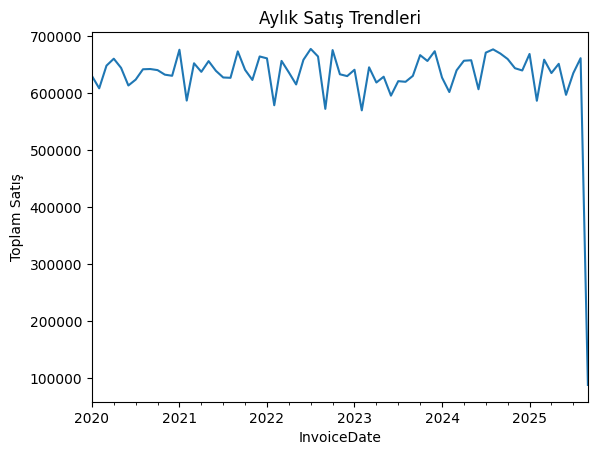

In [21]:
# Aylık toplam satışları görselleştirme
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()
monthly_sales.plot(kind='line', title='Aylık Satış Trendleri', ylabel='Toplam Satış')

**2.  İndirimlerin Satışlara Etkisi:**          

İndirim oranlarına göre satış miktarlarını karşılaştırabiliriz. İndirimlerin satışlar üzerindeki etkisini görselleştirmek, verinin içindeki olası ilişkileri anlamaya yardımcı olur. Bu, fiyatlandırma stratejileri üzerine çıkarımlar yapabilmek için önemlidir.

<Axes: xlabel='Discount', ylabel='TotalSales'>

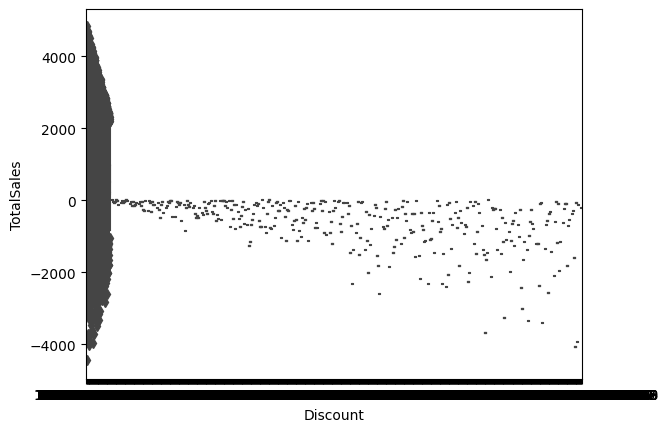

In [22]:
sns.boxplot(x='Discount', y='TotalSales', data=df)

**3. Ürün Kategorilerine Göre Satış Dağılımı:**    

Bar grafikleri ile ürün kategorilerinin satışlarının dağılımını inceleyelim. Ürün kategorilerine göre satışların dağılımı, hangi ürünlerin daha çok satıldığını ve hangi kategorilerin daha fazla gelir getirdiğini analiz etmemizi sağlar.

In [23]:
# Kategori bazında toplam satışları hesapla
category_sales = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)

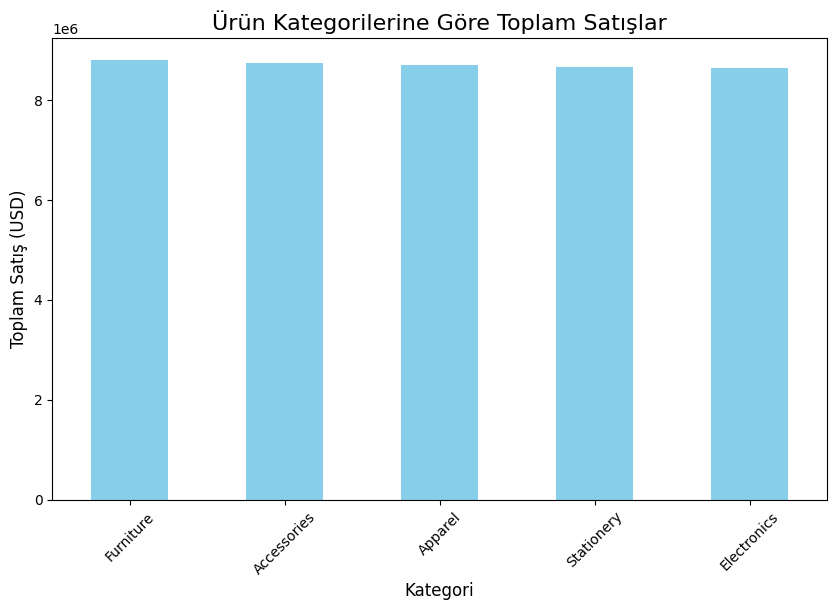

In [24]:
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Ürün Kategorilerine Göre Toplam Satışlar', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Toplam Satış (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**4. Satış Kanalı ve İade Durumu Dağılımı:**          

Satış kanalı ile iade durumu arasındaki ilişkiyi inceledim. Satış kanalı ile iade durumu arasındaki ilişkiyi incelemek, müşteri memnuniyeti ve satış stratejileri üzerine çıkarımlar yapmamıza olanak tanır.

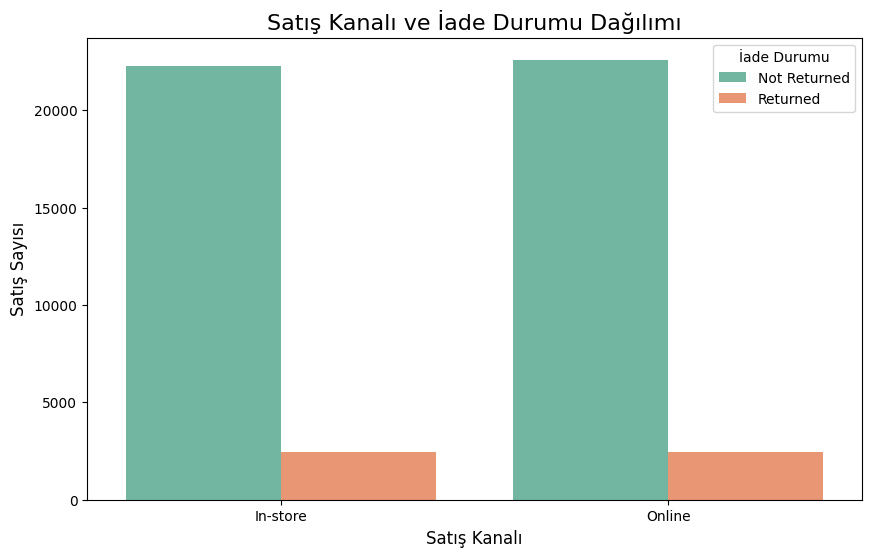

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SalesChannel', hue='ReturnStatus', data=df, palette='Set2')
plt.title('Satış Kanalı ve İade Durumu Dağılımı', fontsize=16)
plt.xlabel('Satış Kanalı', fontsize=12)
plt.ylabel('Satış Sayısı', fontsize=12)
plt.legend(title='İade Durumu')
plt.show()

**5. Kargo Sağlayıcılarının Performansı:**  

Kargo sağlayıcılarının iade oranlarını analiz ettim. Kargo sağlayıcılarının iade oranları gibi metrikleri görselleştirmek, lojistik ve müşteri memnuniyeti üzerinde nasıl iyileştirmeler yapılabileceğine dair bilgiler sunar.

In [26]:
# Kargo sağlayıcılarına göre iade oranı
returns_by_provider = df[df['ReturnStatus'] == 'Returned'].groupby('ShipmentProvider')['ReturnStatus'].count()
total_by_provider = df.groupby('ShipmentProvider')['ReturnStatus'].count()
return_rate = (returns_by_provider / total_by_provider) * 100

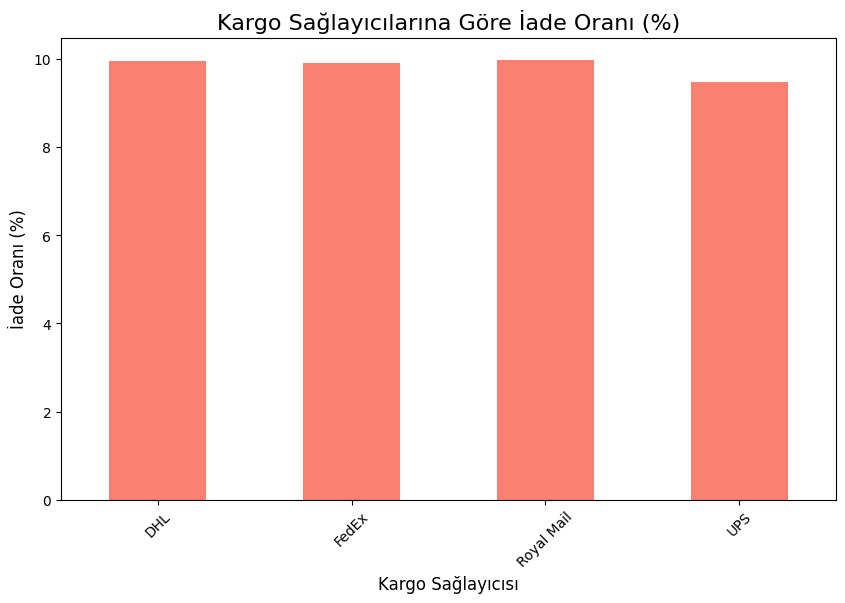

In [27]:
plt.figure(figsize=(10, 6))
return_rate.plot(kind='bar', color='salmon')
plt.title('Kargo Sağlayıcılarına Göre İade Oranı (%)', fontsize=16)
plt.xlabel('Kargo Sağlayıcısı', fontsize=12)
plt.ylabel('İade Oranı (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**6. Korelasyon Analizi :** 

Korelasyon matrisi ile sayısal değişkenler arasındaki ilişkileri görmek, hangi faktörlerin birbirleriyle ilişkili olduğunu anlamamıza yardımcı olur. Sayısal sütunlar arasındaki ilişkileri görselleştirmek için korelasyon matrisi oluşturabiliriz.

In [28]:
# Sayısal sütunları seç
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Sayısal verilerle korelasyon matrisini oluştur
corr_matrix = df[numerical_columns].corr()

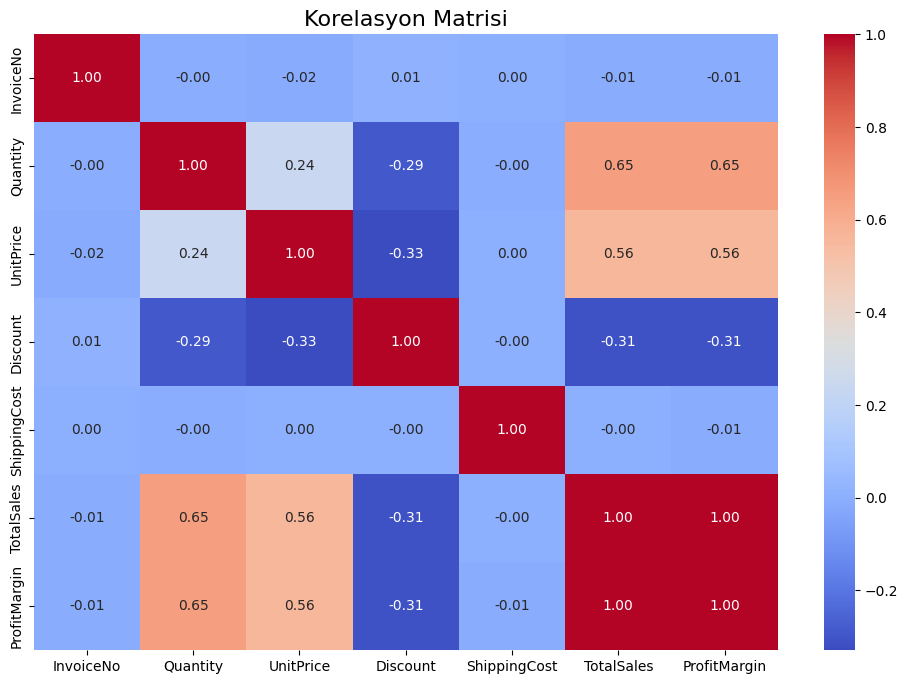

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Korelasyon Matrisi', fontsize=16)
plt.show()

# # Sonuç ve Öneriler
## 1. İndirimlerin Satışlara Etkisi
**Gözlemler:**
- İndirim oranları satış miktarını artırsa da kar marjını düşürebilir.

**Öneriler:**
- Fiyatlandırma stratejileri için indirimlerin optimize edilmesi gerekmektedir. İndirimlerin etkisini analiz ederek uygun oranlar belirlenmelidir.
- Özellikle düşük performanslı kategorilerde stratejik indirimler uygulanabilir.

---

## 2. Kargo Sağlayıcılarının Performansı
**Gözlemler:**
- Bazı kargo sağlayıcılarında iade oranları yüksektir.

**Öneriler:**
- Lojistik süreçlerinde iyileştirme yapılmalı; müşteri memnuniyetine odaklanılmalıdır.
- İade oranları yüksek sağlayıcılar yerine daha güvenilir alternatifler tercih edilebilir.

---

## 3. Ürün Performansı
**Gözlemler:**
- Bazı ürün kategorileri satışlarda büyük pay sahibi iken diğer kategoriler düşük performans göstermektedir.

**Öneriler:**
- Çok satan ürünlerin stok yönetimi iyileştirilmeli, stok tükenme sorunları önlenmelidir.
- Düşük satışlı ürünlerde çapraz satış ve kampanyalar ile gelir artırılabilir.

---

## 4. Modelleme Önerisi
**Gözlemler:**
- Bu veri seti makine öğrenimi modelleri ile daha fazla işlevsel hale getirilebilir.

**Öneriler:**
- Örneğin, `Random Forest Regressor` kullanıltirilmiş kampanyalar uygulanabilir.



## Modelleme 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [31]:
# Model için veri hazırlığı
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
target = 'TotalSales'

In [32]:
X = df[features]
y = df[target]

In [33]:
# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Random Forest Modeli
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Tahminler ve Hata Hesaplama
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

362695.18742870534

### Model Performansı: Mean Squared Error (MSE)


**Açıklama:MSE, modelin tahminleri ile gerçek değerler arasındaki ortalama kare farkını gösterir. Bu değer, modelimizin tahminlerinde belirli bir hata olduğunu gösteriyor. Daha iyi sonuçlar için modelin hiperparametre ayarları yapılabilir veya farklı algoritmalar denenebilir.ğlamaktadır.
